# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install seaborn

In [3]:
!pip install tensorflow

     |████████████████████████████████| 320.4 MB 67 kB/s s eta 0:00:01   |██▏                             | 21.5 MB 6.8 MB/s eta 0:00:44     |██▍                             | 24.0 MB 6.8 MB/s eta 0:00:44     |██▉                             | 28.7 MB 20.5 MB/s eta 0:00:15     |█████▉                          | 58.8 MB 20.5 MB/s eta 0:00:1306     |███████████                     | 110.9 MB 33 kB/s eta 1:45:35     |████████████▋                   | 126.0 MB 33 kB/s eta 1:37:58     |███████████████▎                | 153.1 MB 17 kB/s eta 2:37:14
     |████████████████████████████████| 459 kB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 52.7 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 27.3 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 29.8 MB/s eta 0:00:01
     |███████████████████████████████

In [4]:
!pip install keras

In [5]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train,y_train),(X_test,y_test)=mnist.load_data() #Inbuilt function that divides datasets into training and testing sets

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
Single_image=X_train[0] #First image in the training dataset

In [10]:
Single_image.shape

(28, 28)

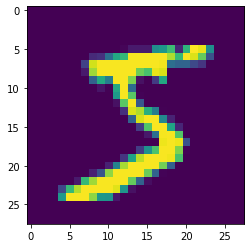

In [11]:
plt.imshow(Single_image) #to display 2D image

In [12]:
y_train #if we pass as such the network would assume it as some sort of continous values and try to predict 5.5,5.7 etc hence we have to convert to categorical values

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_ex=to_categorical(y_train) #converts a class vector(integers) to binary class matrix

In [16]:
y_ex.shape

(60000, 10)

In [17]:
y_ex[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test=to_categorical(y_test,num_classes=10) #converting test labels and train labels to categorical

In [19]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [20]:
#Normalizing the data
Single_image.max()

255

In [21]:
Single_image.min()

0

In [22]:
#Scaled between 0 and 1
X_train=X_train/255 #the images will always have values between 0-255

In [23]:
X_test=X_test/255

In [24]:
scaled_image=X_train[0] #values will be between 0 and 1

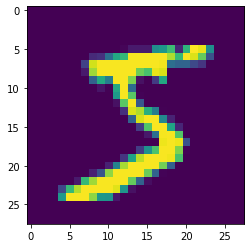

In [28]:
plt.imshow(scaled_image) #shows exactly same as before

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
#(batch_size(all images),width,height,color channel(gray image-black and white))
X_train=X_train.reshape(60000,28,28,1)

In [27]:
X_test=X_test.reshape(10000,28,28,1)

In [28]:
#Creating and traning the model
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [32]:
model=Sequential() #creating an instance 

In [33]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu')) #adding convolutional layer

In [34]:
model.add(MaxPool2D(pool_size=(2,2))) #adding pooling layer-Maxpool

In [35]:
model.add(Flatten()) #Flattening the image 

In [36]:
model.add(Dense(128,activation='relu')) #adding dense layer

In [37]:
model.add(Dense(10,activation='softmax')) #output layer since it is multiclass classification softmax is uses as activation func

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#loss- difference between true and predicted value(for multiclass class classification loss is categorical_crossentropy)
#optimizer- methods to minimize the cost function

In [39]:
#Early stopping is a method to overcome overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [41]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1394 - accuracy: 0.9589 - val_loss: 0.0664 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0515 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0443 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0527 - val_accuracy: 0.9832


In [44]:
#Evaluation of the model
metrics=pd.DataFrame(model.history.history)#will have the loss, accuracy,val_loss,val_accuracy

<AxesSubplot:>

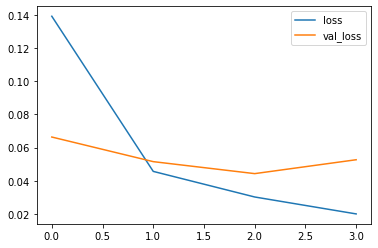

In [45]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

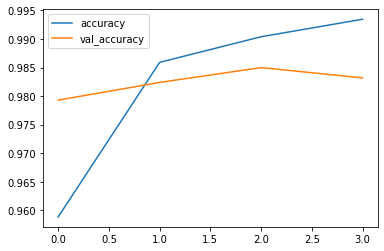

In [46]:
metrics[['accuracy','val_accuracy']].plot()

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate(X_test,y_cat_test,verbose=0) #returns loss and accuracy

[0.05265481024980545, 0.9832000136375427]

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
predictions=model.predict_classes(X_test)

In [52]:
y_cat_test.shape

(10000, 10)

In [53]:
y_test #we have to pass original to classification report

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.93      1.00      0.96      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.95      0.97       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [55]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    2,    1,    0,    0,    2,    0,    1,    0],
       [   0, 1126,    1,    4,    1,    0,    2,    1,    0,    0],
       [   0,    0, 1019,    3,    0,    0,    3,    6,    1,    0],
       [   0,    0,    1, 1009,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,  968,    0,    3,    0,    0,   10],
       [   0,    0,    1,   40,    0,  848,    3,    0,    0,    0],
       [   5,    3,    0,    1,    1,    1,  945,    0,    2,    0],
       [   0,    1,    4,    4,    0,    0,    0, 1015,    1,    3],
       [   4,    0,    2,   12,    0,    1,    1,    4,  947,    3],
       [   3,    0,    0,   13,    3,    0,    0,    7,    2,  981]])

In [56]:
import seaborn as sns

In [57]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

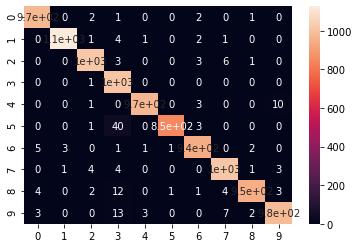

In [58]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [59]:
my_number=X_test[0] #testing for new data point

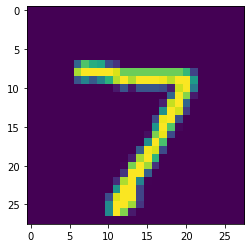

In [60]:
plt.imshow(my_number.reshape(28,28))

In [61]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])